<a href="https://colab.research.google.com/github/suleymansennn/Deep-Learning/blob/main/AudioClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import and Install Dependicies

In [1]:
!pip install tensorflow_io==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt

# 2. Data Loading Function

### 2.1 Define Paths to Files

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.getcwd()

'/content'

In [5]:
capuchin_file = os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", "Parsed_Capuchinbird_Clips", "XC3776-3.wav")
not_capuchin_file = os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", "Parsed_Not_Capuchinbird_Clips", "afternoon-birds-song-in-forest-0.wav")

In [6]:
capuchin_file

'drive/MyDrive/Colab Notebooks/audio/Parsed_Capuchinbird_Clips/XC3776-3.wav'

### 2.2 Build Dataloading Function

In [7]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

### 2.3 Plot Wave

In [8]:
wave = load_wav_16k_mono(capuchin_file)
nwave = load_wav_16k_mono(not_capuchin_file)

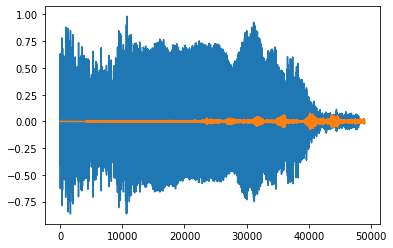

In [9]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# 3. Create Tensorflow Dataset

### 3.1 Define Paths to Positive and Negative Data

In [10]:
#POS = os.path.join("dl_projects", "audio", "Parsed_Capuchinbird_Clips")
#NEG = os.path.join("dl_projects", "audio", "Parsed_Not_Capuchinbird_Clips")
POS = os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", "Parsed_Capuchinbird_Clips")
NEG = os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", "Parsed_Not_Capuchinbird_Clips")

In [11]:
NEG

'drive/MyDrive/Colab Notebooks/audio/Parsed_Not_Capuchinbird_Clips'

### 3.2 Create Tensorflow Datasets

In [12]:
pos = tf.data.Dataset.list_files(POS+"/*.wav")
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [13]:
pos.as_numpy_iterator().next()

b'drive/MyDrive/Colab Notebooks/audio/Parsed_Capuchinbird_Clips/XC216012-1.wav'

### 3.3 Add labels and Combine Positive and Negative Samples

In [14]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [15]:
data.shuffle(10000).as_numpy_iterator().next()

(b'drive/MyDrive/Colab Notebooks/audio/Parsed_Not_Capuchinbird_Clips/birds-singing-in-forest-sounds-16.wav',
 0.0)

# 4. Determine Average Length of a Capuchin Call

In [16]:
os.listdir(os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", "Parsed_Capuchinbird_Clips"))

['XC201990-1.wav',
 'XC178168-1.wav',
 'XC178168-6.wav',
 'XC178167-3.wav',
 'XC178168-7.wav',
 'XC16804-0.wav',
 'XC114132-6.wav',
 'XC114131-3.wav',
 'XC16803-0.wav',
 'XC16803-1.wav',
 'XC114132-3.wav',
 'XC114131-1.wav',
 'XC114132-0.wav',
 'XC168899-0.wav',
 'XC201990-0.wav',
 'XC201990-3.wav',
 'XC201990-2.wav',
 'XC178168-3.wav',
 'XC178167-2.wav',
 'XC178168-0.wav',
 'XC114132-5.wav',
 'XC114131-2.wav',
 'XC114131-4.wav',
 'XC178168-4.wav',
 'XC201990-4.wav',
 'XC16804-1.wav',
 'XC114132-1.wav',
 'XC16803-2.wav',
 'XC178168-2.wav',
 'XC114131-0.wav',
 'XC114132-4.wav',
 'XC178168-5.wav',
 'XC178167-0.wav',
 'XC178167-1.wav',
 'XC114132-2.wav',
 'XC119294-0.wav',
 'XC216010-2.wav',
 'XC22397-6.wav',
 'XC227471-1.wav',
 'XC201990-5.wav',
 'XC22397-1.wav',
 'XC227471-0.wav',
 'XC22397-4.wav',
 'XC22397-2.wav',
 'XC216012-14.wav',
 'XC216010-4.wav',
 'XC227469-2.wav',
 'XC216010-6.wav',
 'XC216012-9.wav',
 'XC22397-5.wav',
 'XC216012-6.wav',
 'XC216010-0.wav',
 'XC227468-4.wav',
 '

### 4.1 Calculate Wave Cycle Length

In [17]:
lengths = []
for file in os.listdir(os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", "Parsed_Capuchinbird_Clips")):
    tensor_wave = load_wav_16k_mono(os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", "Parsed_Capuchinbird_Clips", file))
    lengths.append(len(tensor_wave))

In [18]:
lengths[0:5]

[56000, 48000, 48000, 56000, 56000]

### 4.2 Calculate Mean, Min and Max

In [19]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [20]:
54156 / 16000

3.38475

In [21]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [22]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

# 5. Build Preprocessing Function to Convert to Spectogram

### 5.1 Build Preprocessing Function

In [23]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

### 5.2 Test Out the Function and Viz the Spectrogram

In [24]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [25]:
spectrogram, label = preprocess(filepath, label)

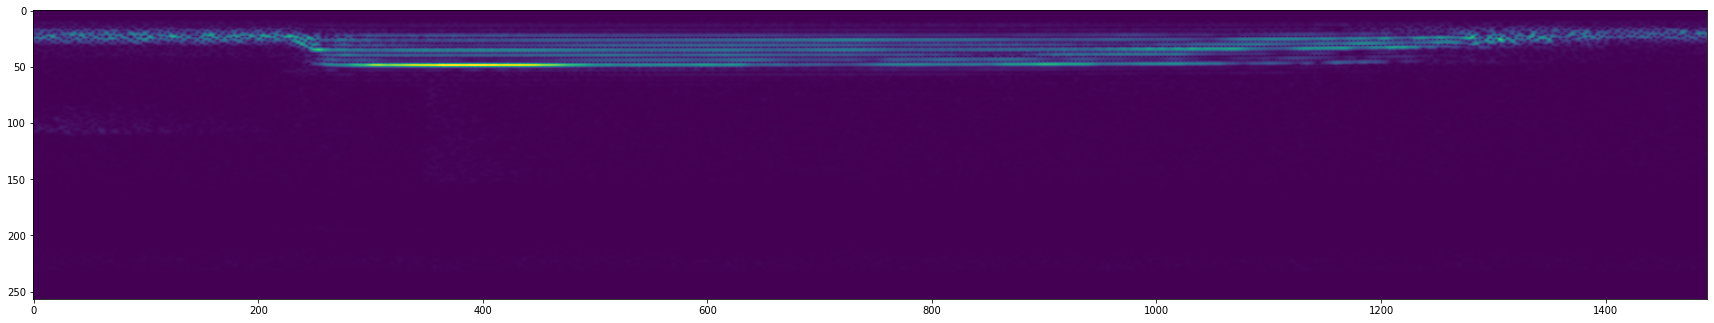

In [26]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

### 6.1 Create a Tensorflow Data Pipeline

In [27]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

### 6.2 Split into Training and Testing Partitions

In [28]:
train = data.take(36)
test = data.skip(36).take(15)

### 6.3 Test One Batch

In [29]:
samples, labels = train.as_numpy_iterator().next()

In [30]:
samples.shape

(16, 1491, 257, 1)

# 7. Build Deep Learning Model

### 7.1 Load Tensorflow Dependencies

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

### 7.2 Build Sequential Model, Compile and View Summary

In [32]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 743, 126, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1497888)           0         
                                                                 
 dense (Dense)               (None, 128)               191729792 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                        

### 7.3 Fit Model, View Loss and KPI Plots

In [35]:
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 13s 228ms/step - loss: 0.9447 - recall: 0.9007 - precision: 0.8395 - val_loss: 0.0263 - val_recall: 0.9692 - val_precision: 1.0000
Epoch 2/4
36/36 [==============================] - 8s 210ms/step - loss: 0.0354 - recall: 0.9815 - precision: 0.9876 - val_loss: 0.0010 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/4
36/36 [==============================] - 8s 213ms/step - loss: 0.0133 - recall: 0.9800 - precision: 1.0000 - val_loss: 0.0166 - val_recall: 1.0000 - val_precision: 0.9825
Epoch 4/4
36/36 [==============================] - 8s 212ms/step - loss: 0.0146 - recall: 0.9938 - precision: 0.9877 - val_loss: 0.0021 - val_recall: 1.0000 - val_precision: 1.0000


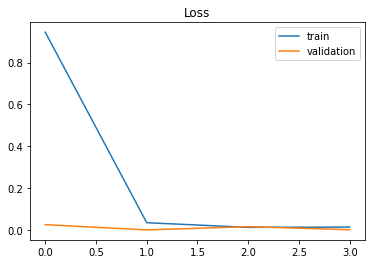

In [36]:
plt.title("Loss")
plt.plot(hist.history["loss"], label="train")
plt.plot(hist.history["val_loss"], label="validation")
plt.legend()
plt.show()

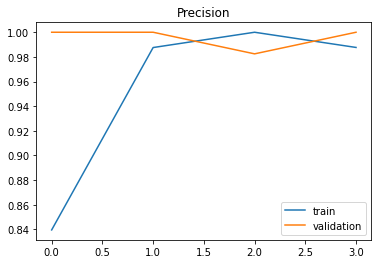

In [38]:
plt.title("Precision")
plt.plot(hist.history["precision"], label="train")
plt.plot(hist.history["val_precision"], label="validation")
plt.legend()
plt.show()

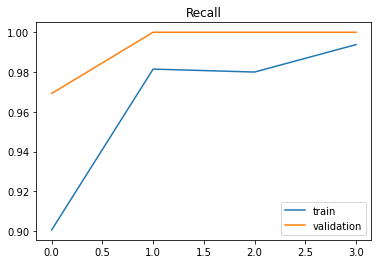

In [42]:
plt.title("Recall")
plt.plot(hist.history["recall"], label="train")
plt.plot(hist.history["val_recall"], label="validation")
plt.legend()
plt.show()

# 8.Make a Prediction on a Single Clip

### 8.1 Get one Batch and Make a Prediction

In [43]:
X_test, y_test = test.as_numpy_iterator().next()

In [44]:
yhat = model.predict(X_test)

8.2 Convert Logits to Classes

In [45]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

### 9.1 Load up MP3s

In [46]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [47]:
mp3 = os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", 'Forest Recordings', 'recording_00.mp3')

In [48]:
wav = load_mp3_16k_mono(mp3)

In [49]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [50]:
samples, index = audio_slices.as_numpy_iterator().next()

### 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [51]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

### 9.3 Convert Longer Clips into Windows and Make Predictions

In [52]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [53]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

### 9.4 Group Consecutive Detections

In [54]:
from itertools import groupby
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()
calls

5

# 10. Make Predictions
### 10.1 Loop over all recordings and make predictions

In [55]:
results = {}
for file in os.listdir(os.path.join("drive", "MyDrive", "Colab Notebooks", "audio", 'Forest Recordings')):
    FILEPATH = os.path.join("drive", "MyDrive", "Colab Notebooks", "audio",'Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [56]:
results

{'recording_13.mp3': array([[6.5669507e-15],
        [7.9187421e-16],
        [4.6233883e-15],
        [1.2264554e-15],
        [7.4358739e-17],
        [2.4667478e-15],
        [3.9667546e-16],
        [1.7049365e-14],
        [9.9970958e-17],
        [4.0724446e-15],
        [3.3232633e-14],
        [2.1231880e-14],
        [6.1342041e-16],
        [1.7435546e-14],
        [1.9875211e-14],
        [1.6921914e-14],
        [7.7202410e-16],
        [5.3025614e-15],
        [1.6407720e-15],
        [7.0404132e-13],
        [8.6237000e-15],
        [7.2306756e-15],
        [1.8132467e-16],
        [4.9671211e-15],
        [8.5503910e-15],
        [2.3329913e-14],
        [5.6397937e-14],
        [1.5074786e-15],
        [3.6456451e-15],
        [1.1737083e-14],
        [2.0773061e-14],
        [1.8318832e-12],
        [6.4167645e-14],
        [1.4970162e-13],
        [1.2211654e-16],
        [8.1380060e-17],
        [2.6254474e-16],
        [3.8053179e-14],
        [2.2445917e-14],
     

### 10.2 Convert Predictions into Classes

In [57]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_13.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_07.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_06.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 'recording_12.mp3': [0,
  0,
  0,
  

### 10.3 Group Consecutive Detections

In [58]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

{'recording_13.mp3': 0,
 'recording_07.mp3': 2,
 'recording_06.mp3': 7,
 'recording_12.mp3': 0,
 'recording_05.mp3': 0,
 'recording_11.mp3': 3,
 'recording_09.mp3': 0,
 'recording_08.mp3': 25,
 'recording_02.mp3': 0,
 'recording_10.mp3': 5,
 'recording_00.mp3': 5,
 'recording_03.mp3': 0,
 'recording_04.mp3': 6,
 'recording_01.mp3': 0,
 'recording_14.mp3': 0,
 'recording_38.mp3': 2,
 'recording_21.mp3': 1,
 'recording_31.mp3': 1,
 'recording_27.mp3': 0,
 'recording_32.mp3': 2,
 'recording_25.mp3': 2,
 'recording_35.mp3': 0,
 'recording_29.mp3': 16,
 'recording_16.mp3': 5,
 'recording_22.mp3': 2,
 'recording_41.mp3': 0,
 'recording_17.mp3': 5,
 'recording_39.mp3': 1,
 'recording_24.mp3': 0,
 'recording_23.mp3': 5,
 'recording_20.mp3': 0,
 'recording_42.mp3': 0,
 'recording_40.mp3': 1,
 'recording_37.mp3': 3,
 'recording_34.mp3': 4,
 'recording_33.mp3': 0,
 'recording_36.mp3': 1,
 'recording_18.mp3': 10,
 'recording_28.mp3': 2,
 'recording_30.mp3': 3,
 'recording_26.mp3': 2,
 'recording_1

# 11. Export Results

In [61]:
import csv
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])